In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'


AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [5]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

time_a1 = expt_a1_file['time']
amoc_timeseries_ann_a1 = expt_a1_file['amoc_timeseries_ann']

In [6]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

time_b1 = expt_b1_file['time']
amoc_timeseries_ann_b1 = expt_b1_file['amoc_timeseries_ann']

In [7]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

time_a2 = expt_a2_file['time']
amoc_timeseries_ann_a2 = expt_a2_file['amoc_timeseries_ann']

In [8]:
# FGOALS-f3-L piControl -> b2 -> no AMOC variables, 
# use historical run as proxy

In [9]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

time_a3 = expt_a3_file['time']
amoc_timeseries_ann_a3 = expt_a3_file['amoc_timeseries_ann']

In [10]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

time_b3 = expt_b3_file['time']
amoc_timeseries_ann_b3 = expt_b3_file['amoc_timeseries_ann']

In [11]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

time_a4 = expt_a4_file['time']
amoc_timeseries_ann_a4 = expt_a4_file['amoc_timeseries_ann']

In [12]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

time_b4 = expt_b4_file['time']
amoc_timeseries_ann_b4 = expt_b4_file['amoc_timeseries_ann']

In [32]:
# cut time variable to same size as timeseries

time_a1_700 = time_a1[1:701]
time_b1_500 = time_b1[1:501]

time_a2_500 = time_a2[1:501]

time_a3_100 = time_a3[1:101]
time_b3_851 = time_b3[1:852]

time_a4_550 = time_a4[1:551]
time_b4_1200 = time_b4[1:1201]


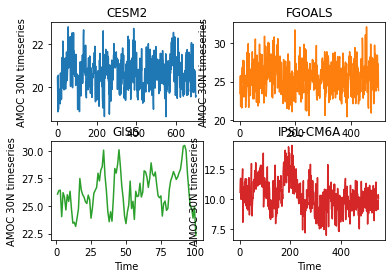

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(time_a1_700, amoc_timeseries_ann_a1, 'tab:blue')
axs[0, 0].set_title('CESM2')
axs[0, 1].plot(time_a2_500, amoc_timeseries_ann_a2, 'tab:orange')
axs[0, 1].set_title('FGOALS')
axs[1, 0].plot(time_a3_100, amoc_timeseries_ann_a3, 'tab:green')
axs[1, 0].set_title('GISS')
axs[1, 1].plot(time_a4_550, amoc_timeseries_ann_a4, 'tab:red')
axs[1, 1].set_title('IPSL-CM6A')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='AMOC 30N timeseries')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

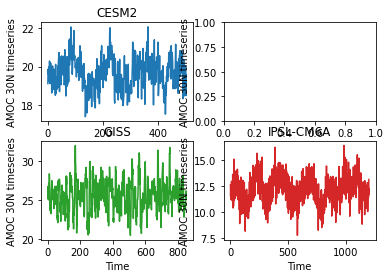

In [33]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(time_b1_500, amoc_timeseries_ann_b1, 'tab:blue')
axs[0, 0].set_title('CESM2')
#axs[0, 1].plot(time_a2_500, amoc_timeseries_ann_a2, 'tab:orange')
#axs[0, 1].set_title('FGOALS')
axs[1, 0].plot(time_b3_851, amoc_timeseries_ann_b3, 'tab:green')
axs[1, 0].set_title('GISS')
axs[1, 1].plot(time_b4_1200, amoc_timeseries_ann_b4, 'tab:red')
axs[1, 1].set_title('IPSL-CM6A')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='AMOC 30N timeseries')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()